Kelompok 8:


*   Allin Setiawan - 2602191301
*   Callista Serena Ekaputri - 2602197305
*   Janice Ashley Kurniawan - 2602203794




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
df = pd.read_csv("HeartAttackDataSet.csv")

**Data Understanding**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dalam dataset ini tidak terdapat nilai yang null namun ada satu variable dengan tipe data float.

In [7]:
df.shape

(303, 14)

Dataset ini terdiri dari 303 baris data dan 14 kolom.

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age: Age (in years)

sex:
* 1 = male
* 0 = female

cp: Chest Pain type
* 1 = typical angina (all criteria present)
* 2 = atypical angina (two of three criteria satisfied)
* 3 = non-anginal pain (less than one criteria satisfied)
* 4 = asymptomatic (none of the criteria are satisfied)

trestbps: Resting blood pressure (mmHg)

chol: serum cholesterol (mg/dL)

fbs: Fasting blood sugar > 120 mg/dL (kemungkinan diabetes)
* 1 = true
* 0 = false

restECG: Resting electrocardiogram results
* 0 = normal
* 1 = having ST-T wave abnormality
* 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise

exang: exercise induced angina
* 1 = yes
* 0 = no

oldpeak: ST depression induced by exercise relative to rest (mm)

slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia
* 1 = upsloping
* 2 = flat
* 3 = downsloping

ca: number of major vessels (0-3) colored by fluoroscopy

thal:
* 0 = normal
* 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
* 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

target: refers to the presence of heart disease in the patient
* 0 = no disease
* 1 = disease

In [9]:
df['thal'] = df['thal'].replace({0: 0, 1: 0, 2: 1, 3: 2})

In [10]:
for i in df.columns:
    print("Column:", i)
    print(df[i].value_counts(ascending=True))

Column: age
age
77     1
76     1
74     1
29     1
37     2
34     2
38     3
40     3
69     3
71     3
70     4
68     4
39     4
35     4
47     5
49     5
50     7
66     7
48     7
46     7
53     8
65     8
45     8
42     8
43     8
55     8
61     8
67     9
63     9
41    10
64    10
44    11
60    11
56    11
62    11
51    12
52    13
59    14
54    16
57    17
58    19
Name: count, dtype: int64
Column: sex
sex
0     96
1    207
Name: count, dtype: int64
Column: cp
cp
3     23
1     50
2     87
0    143
Name: count, dtype: int64
Column: trestbps
trestbps
164     1
114     1
104     1
155     1
117     1
101     1
156     1
200     1
174     1
192     1
172     1
129     1
123     1
154     1
165     1
106     1
102     2
94      2
178     2
148     2
146     2
144     2
115     3
126     3
136     3
142     3
180     3
105     3
100     4
122     4
170     4
145     5
152     5
134     5
124     6
108     6
135     6
118     7
132     8
112     9
125    11
160    11
128    

In [11]:
# Mengubah variable oldpeak yang awalnya memiliki tipe data float menjadi int
df['oldpeak'] = df['oldpeak'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


Setelah tipe data dari variable oldpeak diubah, kini seluruh variable memiliki tipe data int.

Correlations

<Axes: >

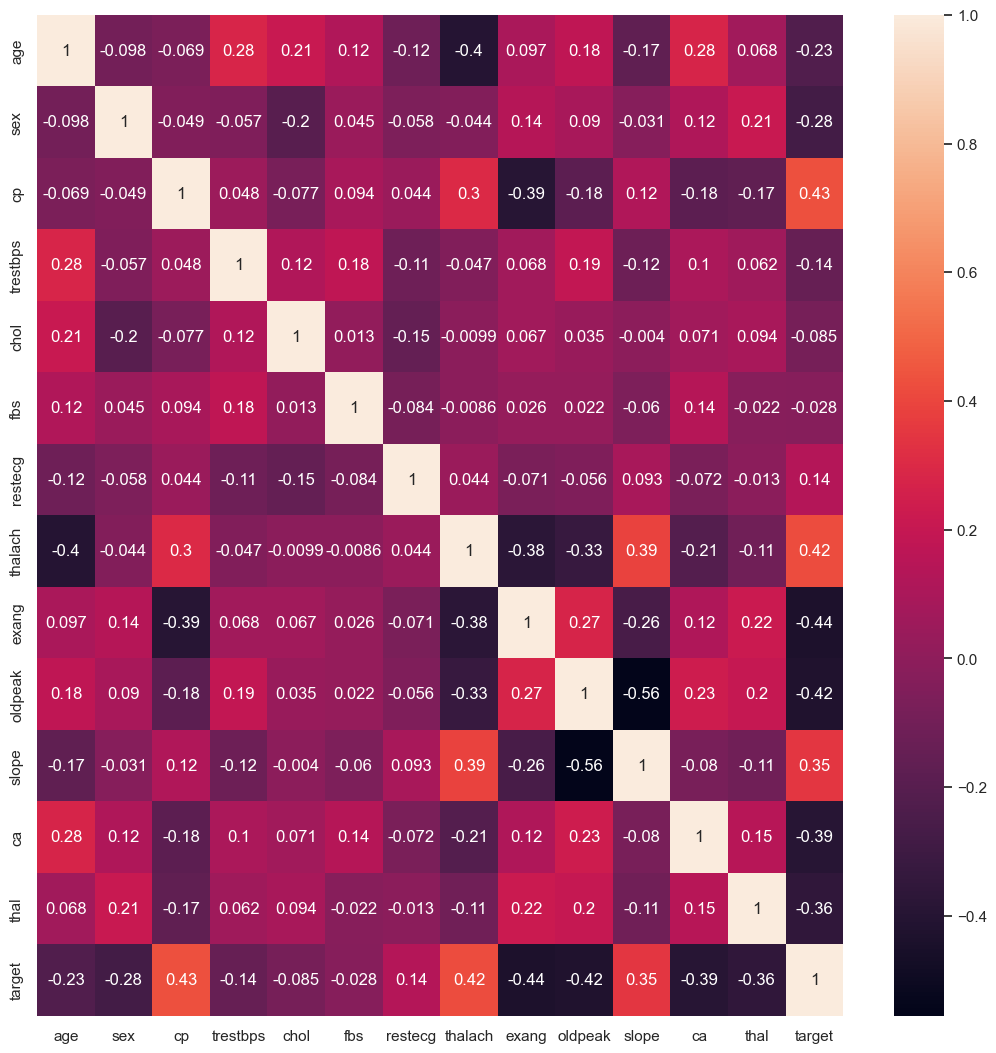

In [13]:
sns.set(rc={'figure.figsize': (13,13)})
sns.heatmap(df.corr(), annot=True)

In [14]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [15]:
input_df=df.drop('target',axis=1)
output_df=df['target']

**Model Naive Bayes**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

NB_class =MultinomialNB()
NB_class.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_predict=NB_class.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.78      0.82      0.80        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



Hasil dari Classification menggunakan model Naive Bayes, Classification Report terbagi menjadi 2 kelas. Pada kelas tersebut dapat dilihat bahwa kelas 0 dan 1 memiliki hasil prediksi yang cukup baik dengan precision 0.76 dan 0.78, recall 0.70 dan 0.82, f1-score 0.73 dan 0.80, support 27 dan 34. Sehingga dari 2 kelas tersebut memiliki nilai accuracy 0.77.

Accuracy score: 0.7704918032786885
F1-Score: 0.8


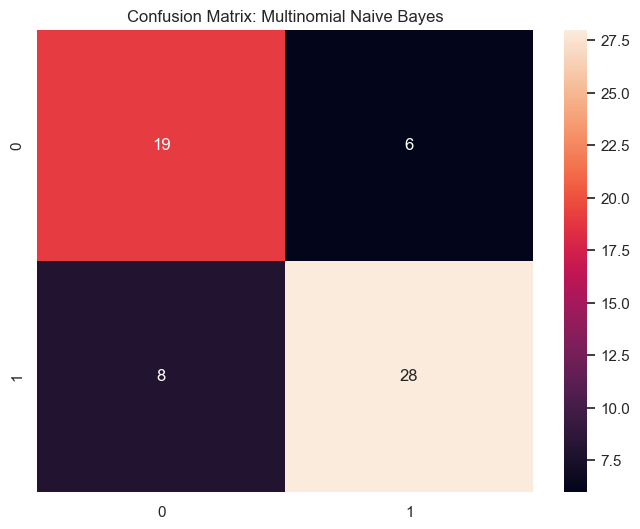

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm_MultinomialNB=confusion_matrix(y_predict,y_test)
MultinomialNB_Accuracy = accuracy_score(y_predict,y_test)
F1_ScoreNB = f1_score(y_predict, y_test)
print('Accuracy score:',MultinomialNB_Accuracy)
print('F1-Score:',F1_ScoreNB)
sns.heatmap(cm_MultinomialNB,annot=True)
plt.title('Confusion Matrix: Multinomial Naive Bayes')
plt.show()

**Model KNN**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
KNN_class = KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN_class.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_predict=KNN_class.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



Hasil dari Classification menggunakan model KNN, Classification Report terbagi menjadi 2 kelas. Pada kelas tersebut dapat dilihat bahwa kelas 0 dan 1 memiliki hasil prediksi yang cukup baik dengan precision 0.59 dan 0.69, recall 0.63 dan 0.65, f1-score 0.61 dan 0.67, support 27 dan 34. Sehingga dari 2 kelas tersebut memiliki nilai accuracy 0.64.

Accuracy score: 0.639344262295082
F1-Score: 0.6666666666666666


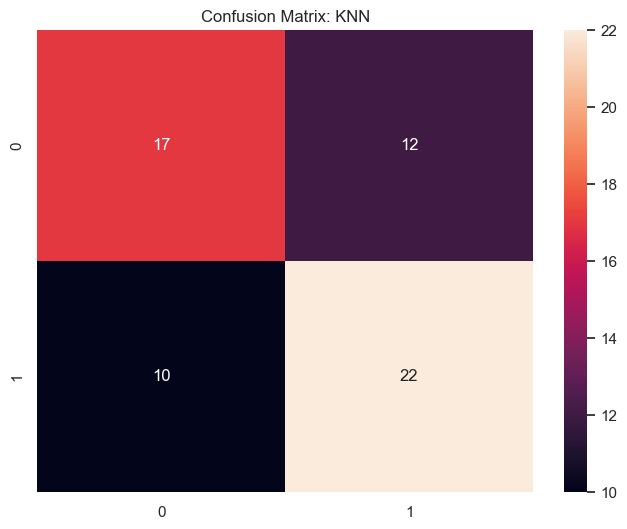

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm_KNN=confusion_matrix(y_predict,y_test)
KNN_Accuracy = accuracy_score(y_predict,y_test)
F1_ScoreKNN = f1_score(y_predict,y_test)
print('Accuracy score:',KNN_Accuracy)
print('F1-Score:',F1_ScoreKNN)
sns.heatmap(cm_KNN,annot=True)
plt.title('Confusion Matrix: KNN')
plt.show()

**Model Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier()
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)

In [26]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



Hasil dari Classification menggunakan model Decision Tree, Classification Report terbagi menjadi 2 kelas. Pada kelas tersebut dapat dilihat bahwa kelas 0 dan 1 memiliki hasil prediksi yang cukup baik dengan precision 0.75 dan 0.82, recall 0.78 dan 0.79, f1-score 0.76 dan 0.81, support 27 dan 34. Sehingga dari 2 kelas tersebut memiliki nilai accuracy 0.79.

Accuracy score: 0.7868852459016393
F1-Score: 0.8059701492537313


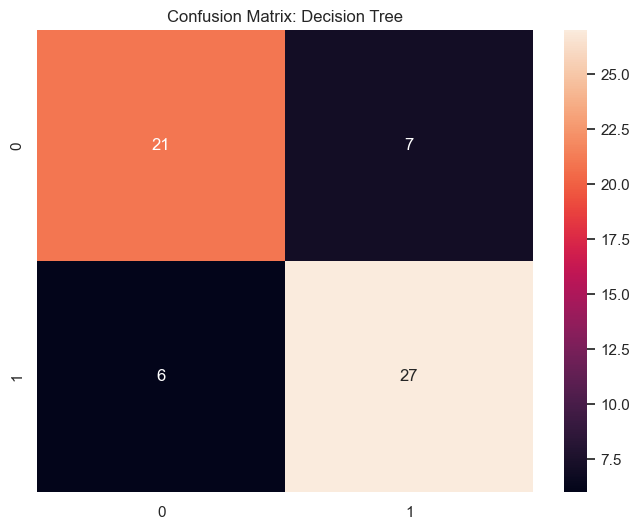

In [27]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm_DecisionTree=confusion_matrix(y_predict,y_test)
DecisionTree_Accuracy  = accuracy_score(y_predict,y_test)
F1_ScoreDT = f1_score(y_predict, y_test)
print('Accuracy score:', DecisionTree_Accuracy)
print('F1-Score:',F1_ScoreDT)
sns.heatmap(cm_DecisionTree,annot=True)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

**Model Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [29]:
y_predict=RF_class.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Hasil dari Classification menggunakan model Random Forest, Classification Report terbagi menjadi 2 kelas. Pada kelas tersebut dapat dilihat bahwa kelas 0 dan 1 memiliki hasil prediksi yang baik dengan precision 0.88 dan 0.84, recall 0.78 dan 0.91, f1-score 0.82 dan 0.87, support 27 dan 34. Sehingga dari 2 kelas tersebut memiliki nilai accuracy 0.85.

Accuracy score: 0.8524590163934426
F1-Score: 0.8732394366197183


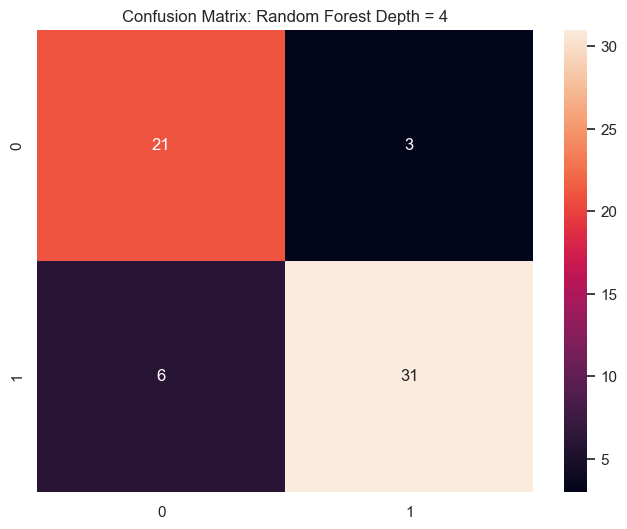

In [31]:
sns.set(rc={'figure.figsize':(8,6)})
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
cm_RandomForest=confusion_matrix(y_predict,y_test)
RandomForest_Accuracy = accuracy_score(y_predict,y_test)
F1_ScoreRF =f1_score(y_predict,y_test)
print('Accuracy score:',RandomForest_Accuracy)
print('F1-Score:',F1_ScoreRF)
sns.heatmap(cm_RandomForest,annot=True)
plt.title('Confusion Matrix: Random Forest Depth = 4')
plt.show()

Evaluate Model

In [32]:
comparison = pd.DataFrame({'Model': ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest'],
                        'Accuracy': [MultinomialNB_Accuracy, KNN_Accuracy, DecisionTree_Accuracy, RandomForest_Accuracy],
                        'F1_Score': [F1_ScoreNB, F1_ScoreKNN, F1_ScoreDT, F1_ScoreRF],
                        'Confusion Matrix': [cm_MultinomialNB, cm_KNN, cm_DecisionTree, cm_RandomForest]})

comparison

,Model,Accuracy,F1_Score,Confusion Matrix
0,Naive Bayes,0.770492,0.800000,"[[19, 6], [8, 28]]"
1,KNN,0.639344,0.666667,"[[17, 12], [10, 22]]"
2,Decision Tree,0.786885,0.805970,"[[21, 7], [6, 27]]"
3,Random Forest,0.852459,0.873239,"[[21, 3], [6, 31]]"


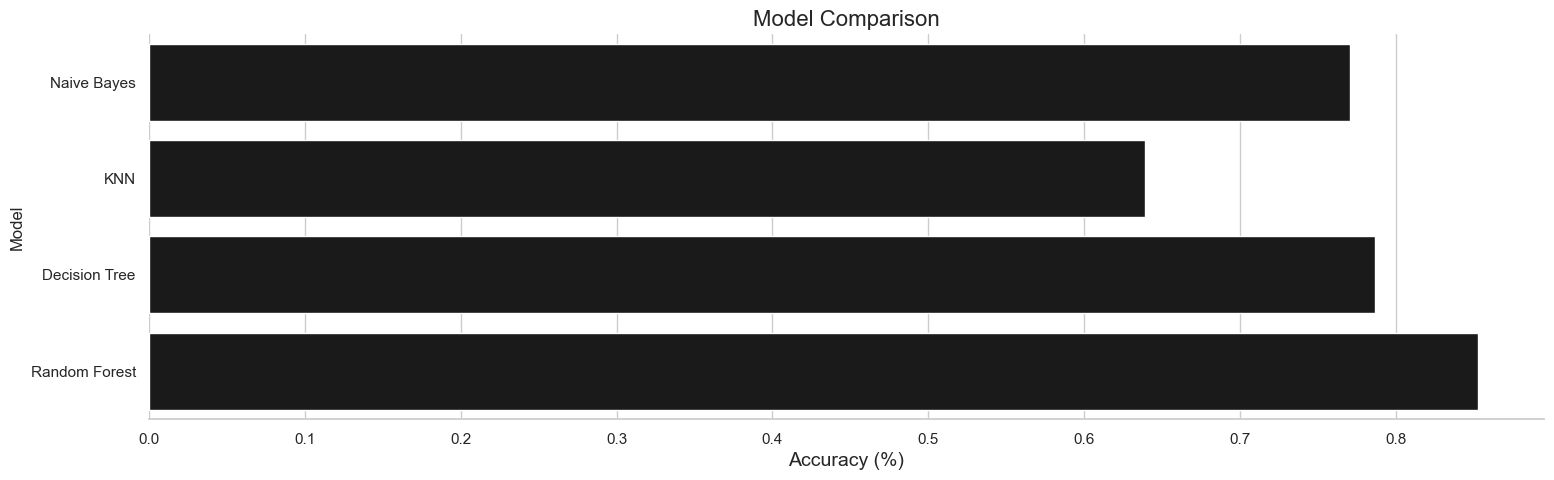

In [33]:
plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
ax = sns.barplot(x='Accuracy', y='Model', data=comparison, color='k')

sns.despine(left=True)
plt.title('Model Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)

plt.show()

Dari keempat hasil classification yang telah dilakukan menggunakan model Naive Bayes, KNN, Decision Tree, dan Random Forest, dapat dilihat bahwa model Random Forest memiliki hasil prediction yang paling baik dengan nilai accuracy tertinggi (0.85) dan memiliki nilai yang konsisten dalam melakukan prediksi yang baik pada data baru yang belum terlihat.

In [34]:
import pickle

with open('rf_model.pkl','wb') as f:
    pickle.dump(RF_class,f)